In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

Univariate Analysis

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
new_data=data[['Geography','Gender','Exited']]

In [5]:
new_data.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [6]:
new_data.Exited.value_counts()

,count
Exited,
0,7963
1,2037


In [7]:
new_data.Exited.value_counts()/len(new_data)*100

,count
Exited,
0,79.63
1,20.37


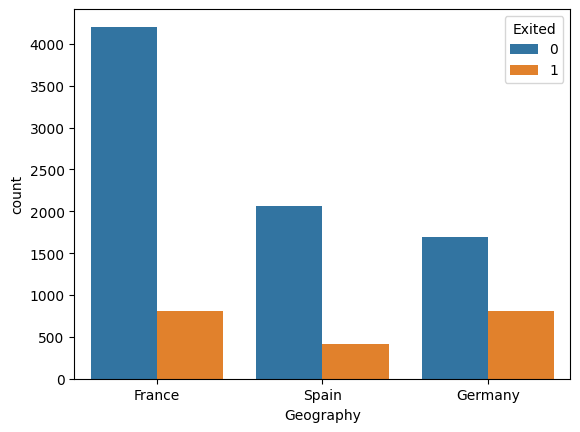

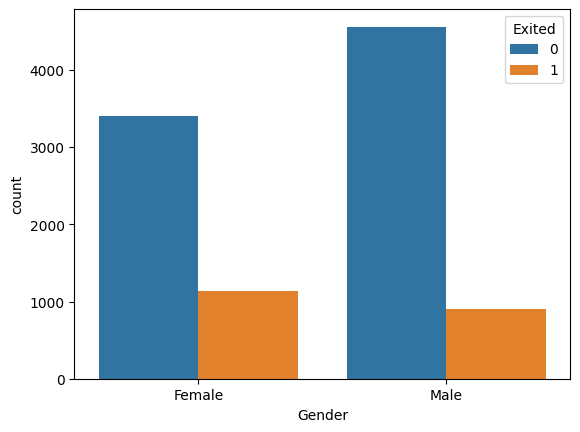

In [9]:
for i,predictor in enumerate(new_data.drop(columns=['Exited'])):
  plt.figure()
  sns.countplot(data=new_data,x=predictor,hue='Exited')

Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

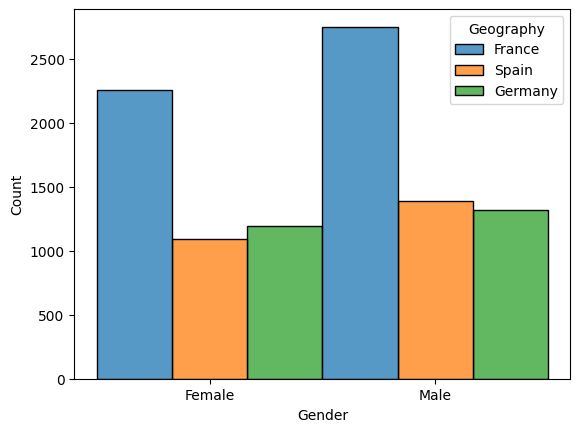

In [10]:
sns.histplot(x='Gender',hue='Geography',data=new_data,stat='count',multiple='dodge')

Numerical Analysis

Correlation:it ranges from -1 to +1
+1 -> positive correlation
-1 -> negative
0 -> no correlation

In [11]:
numeric_data = data.select_dtypes(include=['number'])
print(numeric_data.corr())

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

In [12]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [13]:
data_ready = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
data_encoded = pd.get_dummies(
    data_ready,
    columns=['Geography', 'Gender'],
    drop_first=True
)
correlation_matrix_with_categories = data_encoded.corr()
print(correlation_matrix_with_categories)

                   CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore           1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                  -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance               0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts         0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard            -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember        0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary      -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited               -0.027094  0.285323 -0.014001  0.118533      -0.047820   
Geography_Germany     0.005538  0.046897 -0.000567  0.401110      -0.010419   
Geography_Spain       0.004780 -0.001685  0.003868 -0.134892       0.009039   
Gender_Male          -0.002857 -0.027544  0.014733  

In [14]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [16]:
df = pd.DataFrame(data)

<Axes: xlabel='Age'>

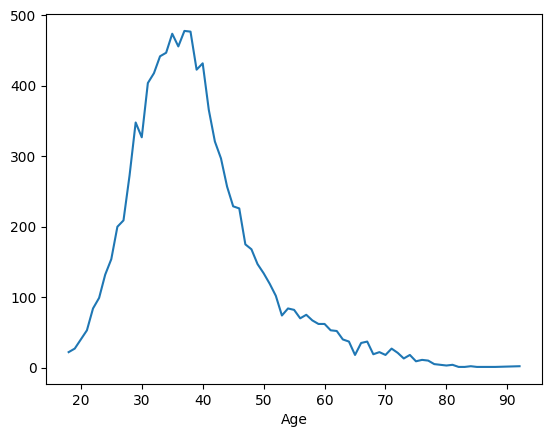

In [21]:
data['Age'].value_counts().sort_index(ascending=True).plot()

In [23]:
data_1=data.loc[data['Exited']==1]

<Axes: xlabel='Age'>

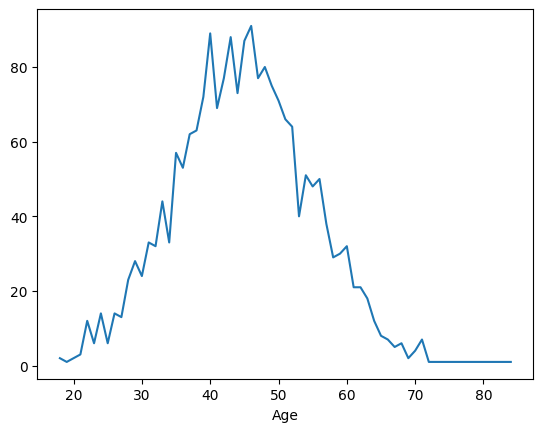

In [24]:
data_1['Age'].value_counts().sort_index(ascending=True).plot()

/tmp/ipython-input-1733707564.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data.Age[(data['Exited']==0)],color='Red',shade=True)
/tmp/ipython-input-1733707564.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data.Age[(data['Exited']==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Age by Churn')

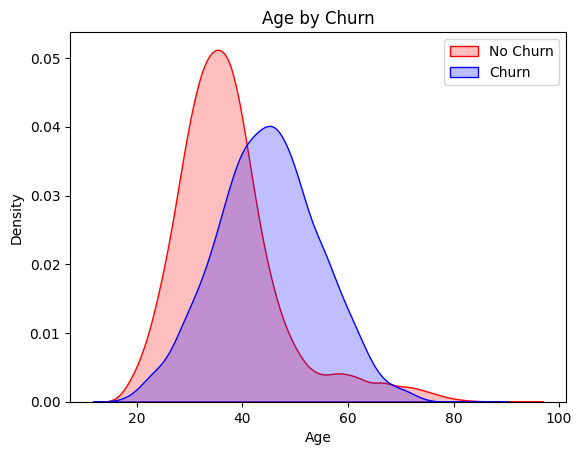

In [25]:
tot=sns.kdeplot(data.Age[(data['Exited']==0)],color='Red',shade=True)
tot=sns.kdeplot(data.Age[(data['Exited']==1)],color='Blue',shade=True)
tot.legend(["No Churn","Churn"],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Age')
tot.set_title('Age by Churn')

/tmp/ipython-input-3660460174.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data.Tenure[(data['Exited']==0)],color='red',shade=True)
/tmp/ipython-input-3660460174.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data.Tenure[(data['Exited']==1)],color='blue',shade=True)


Text(0.5, 1.0, 'Age by churn')

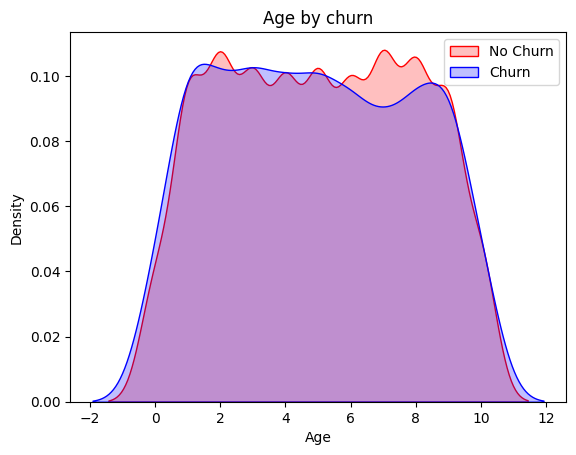

In [26]:
tot=sns.kdeplot(data.Tenure[(data['Exited']==0)],color='red',shade=True)
tot=sns.kdeplot(data.Tenure[(data['Exited']==1)],color='blue',shade=True)
tot.legend(['No Churn','Churn'],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Age')
tot.set_title('Age by churn')

/tmp/ipython-input-768174697.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data.Balance[(data['Exited']==0)],color='red',shade=True)
/tmp/ipython-input-768174697.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data.Balance[(data['Exited']==1)],color='blue',shade=True)


Text(0.5, 1.0, 'Balance by churn')

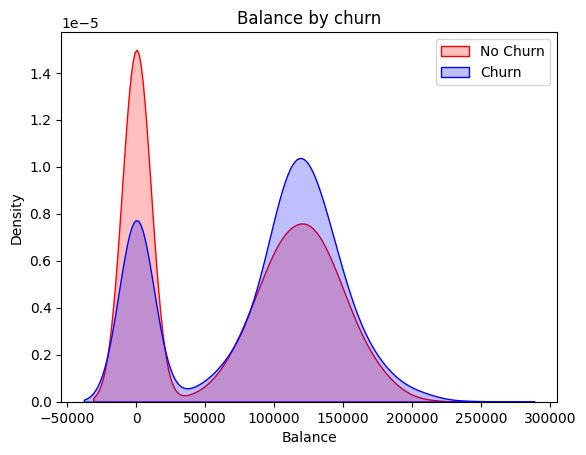

In [27]:
tot=sns.kdeplot(data.Balance[(data['Exited']==0)],color='red',shade=True)
tot=sns.kdeplot(data.Balance[(data['Exited']==1)],color='blue',shade=True)
tot.legend(['No Churn','Churn'],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Balance')
tot.set_title('Balance by churn')